# **Libraries and Tools Used for Data Analysis and Modeling**

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Standard libraries
import os
import math

# Data manipulation & analysis
import pandas as pd
from pandas import DataFrame
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

# Statistics
from scipy import stats

# Scikit-learn (ML tools & evaluation)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# XGBoost
from xgboost import XGBRegressor

# TensorFlow / Keras (Deep Learning)
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# **Data Loading**

In [2]:
df = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',', low_memory=False)
df = df.reset_index(drop=True)

# **EDA and Preprocessing**

In [3]:
df.shape

(9471, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [7]:
df['Time'] = df['Time'].str.replace('.', ':', regex=False)
print(df['Time'].head())

0    18:00:00
1    19:00:00
2    20:00:00
3    21:00:00
4    22:00:00
Name: Time, dtype: object


In [8]:
df['DateTime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    dayfirst=True,  # interpret as DD/MM/YYYY
    errors='coerce'
)

df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16',"Date", "Time"], errors='ignore')
df = df.set_index('DateTime').sort_index()

In [9]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum().sort_values(ascending=False)

,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1.0 MB


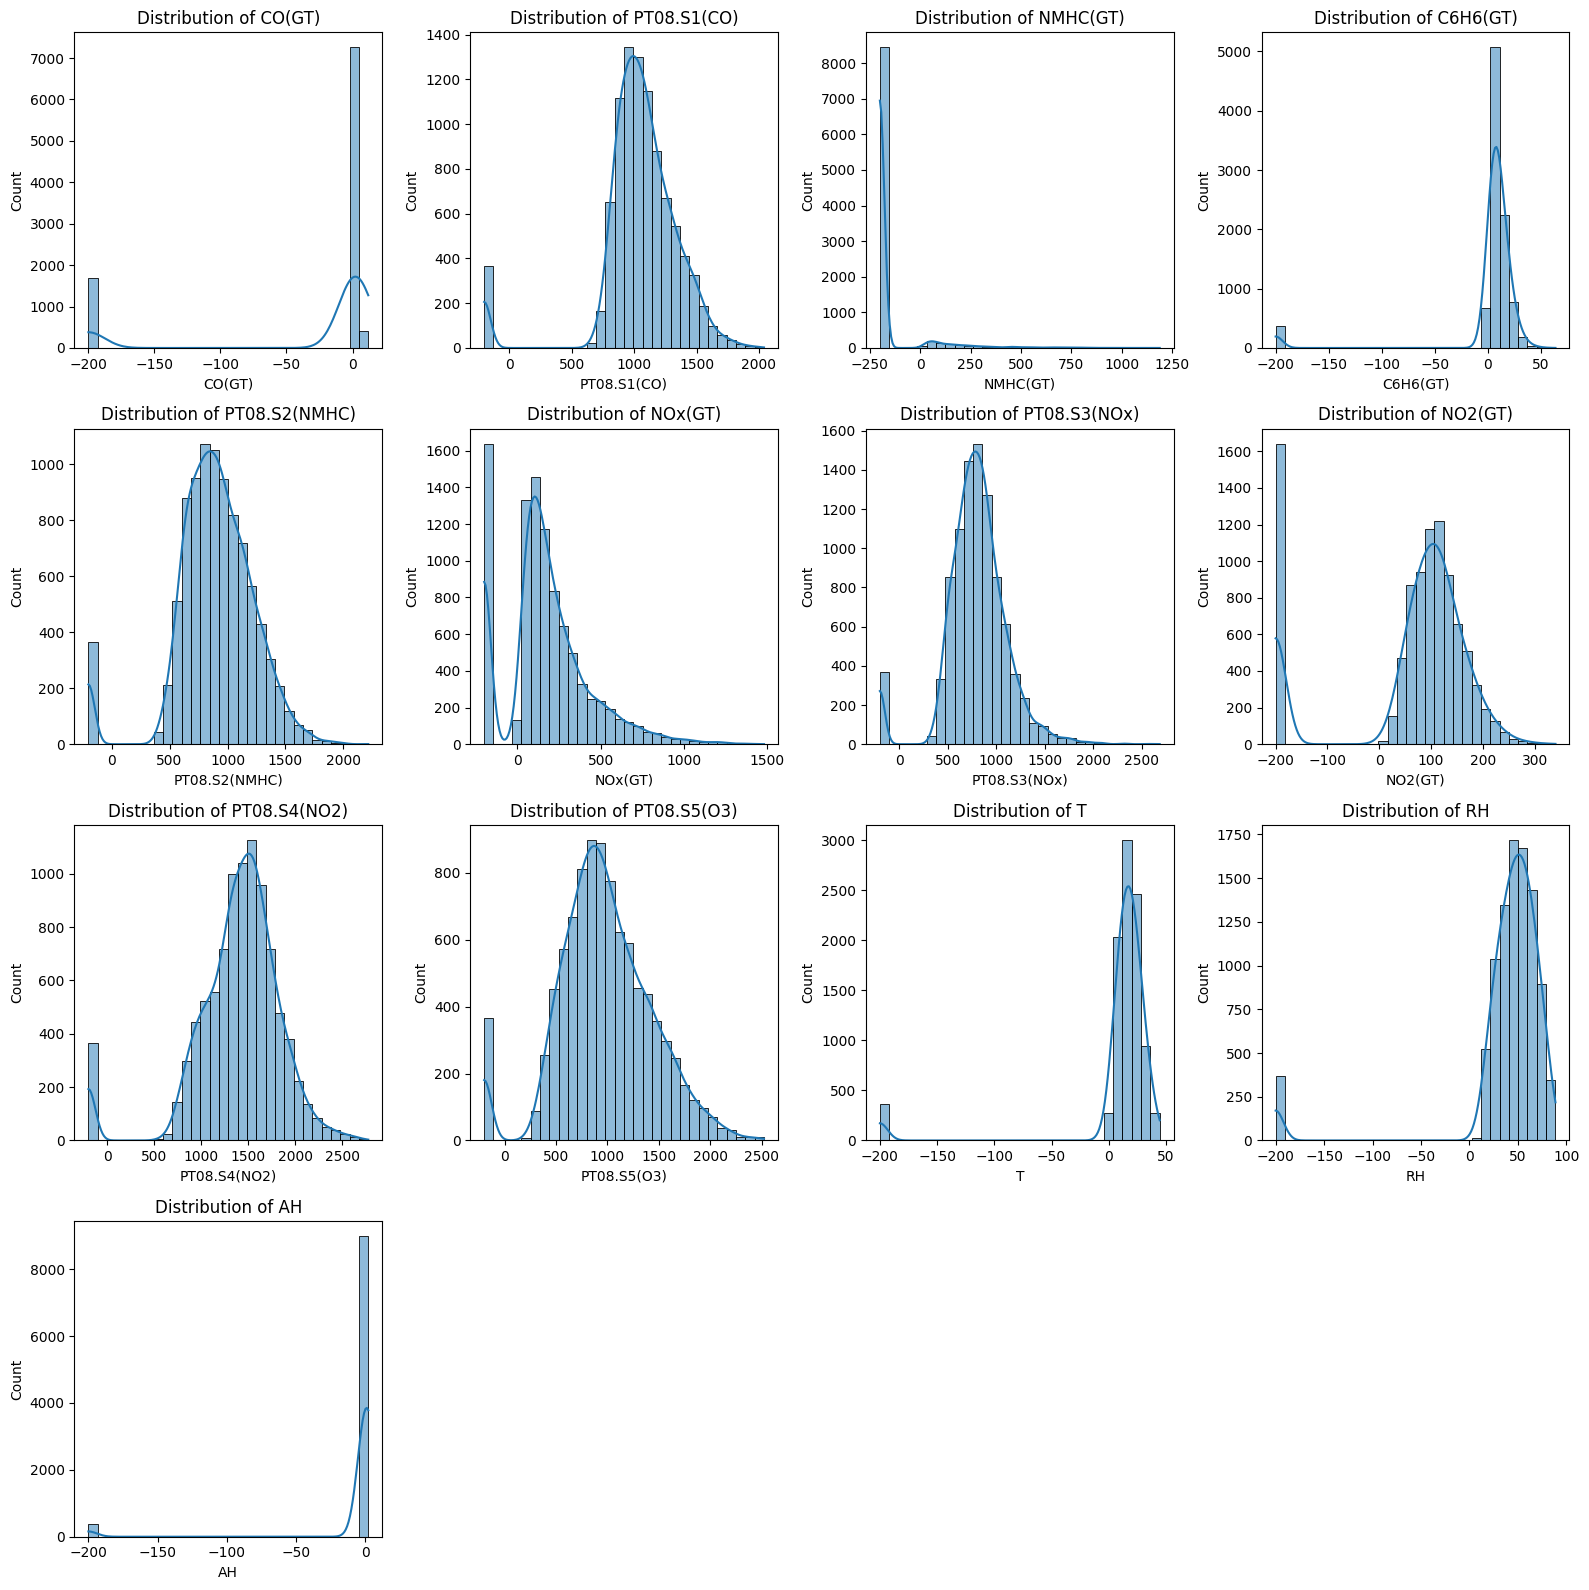

In [12]:
numeric_cols=df.select_dtypes(include='number').columns
n = len(numeric_cols)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO(GT)')

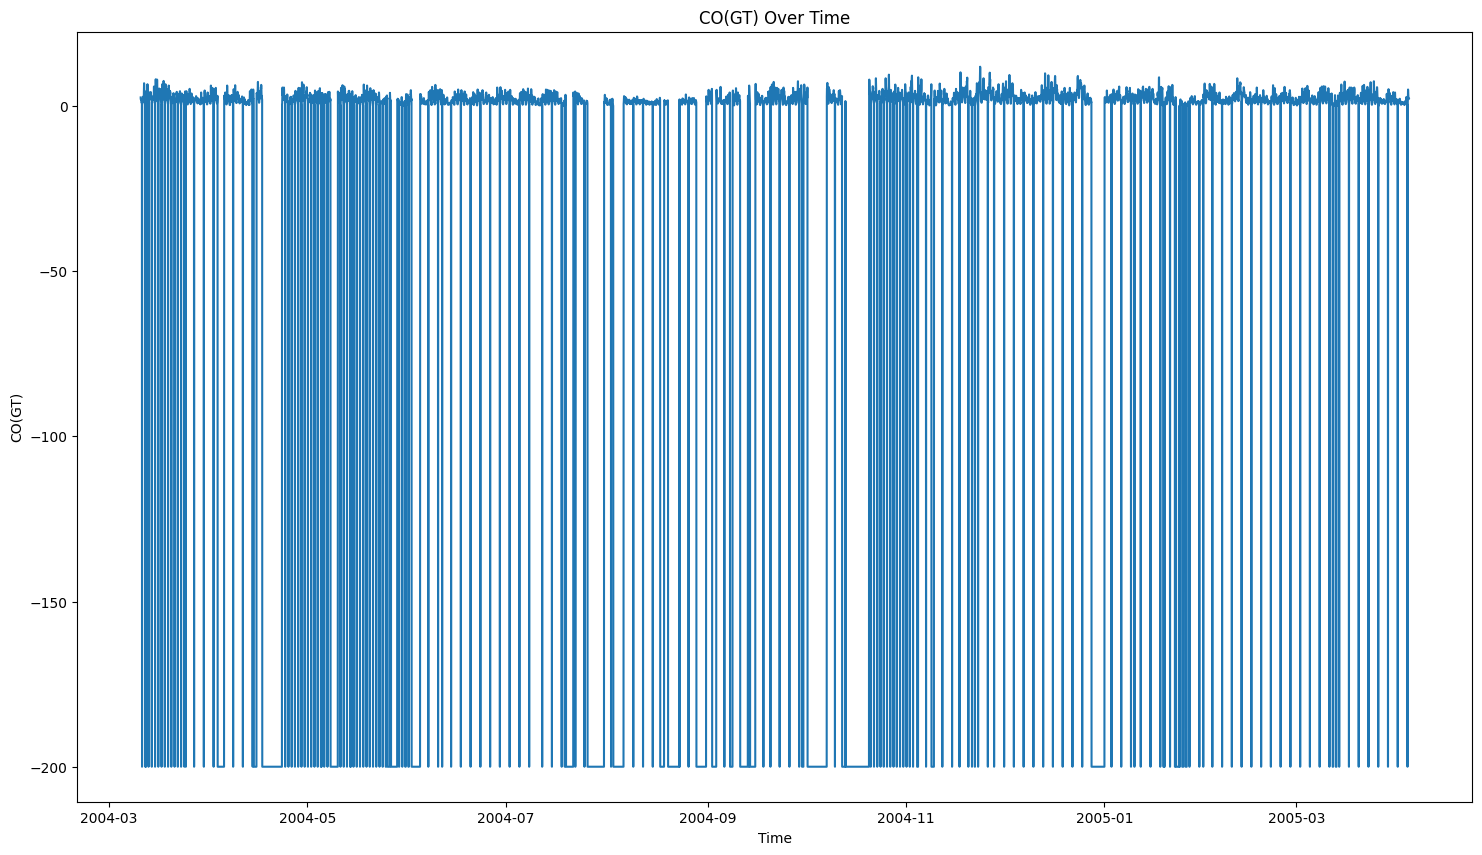

In [13]:
plt.figure(figsize=(18,10 ))
plt.plot(df.index, df['CO(GT)'], label='CO(GT)')
plt.title('CO(GT) Over Time')
plt.xlabel('Time')
plt.ylabel('CO(GT)')


Text(0, 0.5, 'NO2(GT)')

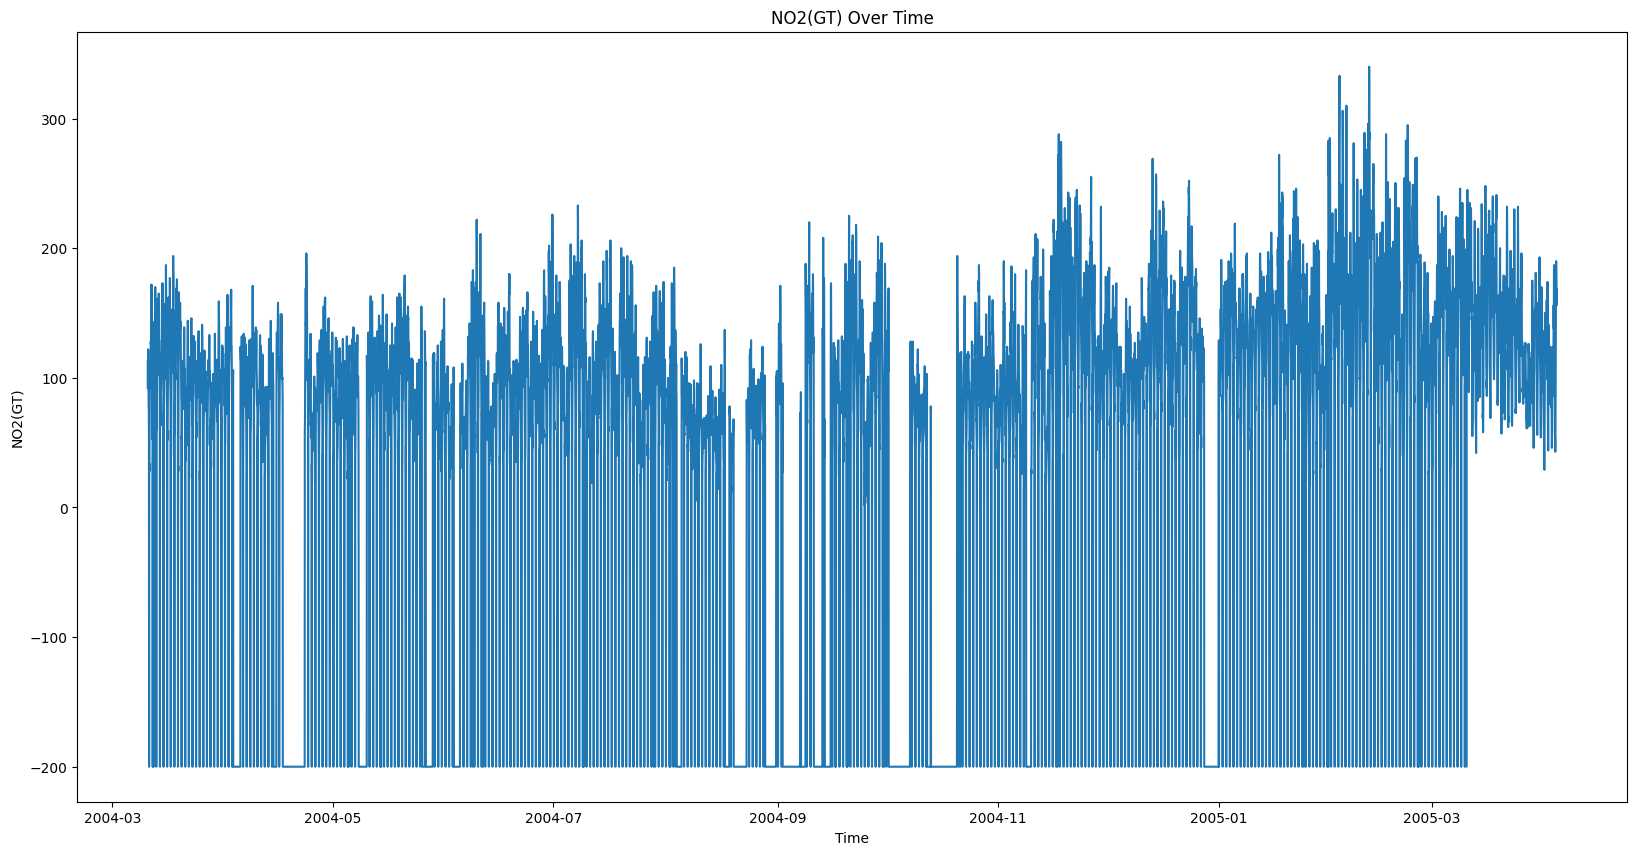

In [14]:
plt.figure(figsize=(20,10 ))
plt.plot(df.index, df['NO2(GT)'], label='NO2(GT)')
plt.title('NO2(GT) Over Time')
plt.xlabel('Time')
plt.ylabel('NO2(GT)')

In [15]:
df.apply(lambda col: col.duplicated().sum()).sort_values(ascending=False).to_frame("Duplicate Values")

,Duplicate Values
CO(GT),9373
NO2(GT),9186
C6H6(GT),9062
NMHC(GT),9040
T,9033
RH,8716
NOx(GT),8544
PT08.S1(CO),8428
PT08.S3(NOx),8248
PT08.S2(NMHC),8224


In [16]:
print('number of -200 sensor erorr ')
(df == -200).sum() #sensor error

number of -200 sensor erorr 


,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366
PT08.S5(O3),366


In [17]:
df.replace(-200, np.nan, inplace=True)

In [18]:
pd.DataFrame(df.isnull().sum(), columns=['Nulls']).sort_values(by='Nulls', ascending=False)

,Nulls
NMHC(GT),8557
CO(GT),1797
NO2(GT),1756
NOx(GT),1753
PT08.S1(CO),480
PT08.S2(NMHC),480
C6H6(GT),480
PT08.S3(NOx),480
PT08.S4(NO2),480
PT08.S5(O3),480


In [19]:
def fill_mssing_values(df):
  for col in df.columns:
    df[col].fillna(df[col].median(), inplace=True)
  return df
df.drop('NMHC(GT)', axis=1, inplace=True)
df.dropna(axis=0 , inplace=True)
df = fill_mssing_values(df)
pd.DataFrame(df.isnull().sum(), columns=['Nulls']).sort_values(by='Nulls', ascending=False)


pd.DataFrame(df.isnull().sum(), columns=['Nulls']).sort_values(by='Nulls', ascending=False)

,Nulls
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0
T,0


In [20]:
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [21]:
df.shape

(6941, 12)

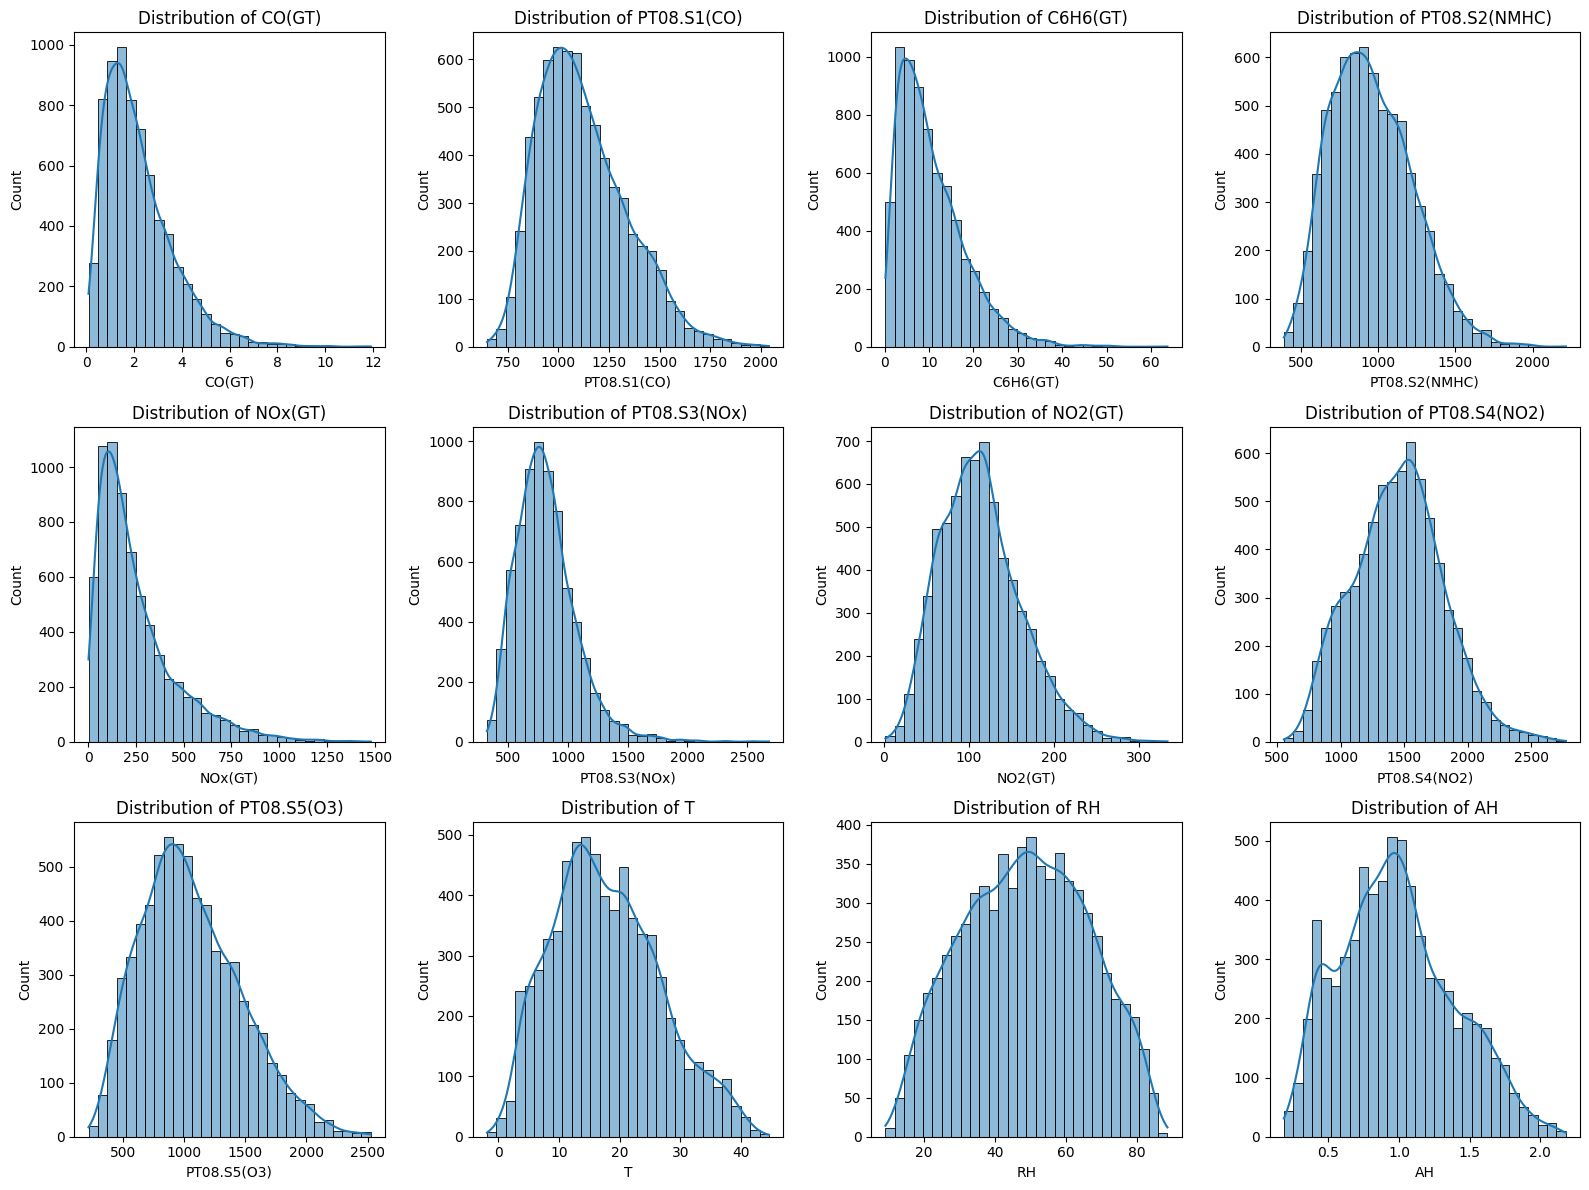

In [22]:
numeric_cols=df.select_dtypes(include='number').columns
n = len(numeric_cols)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

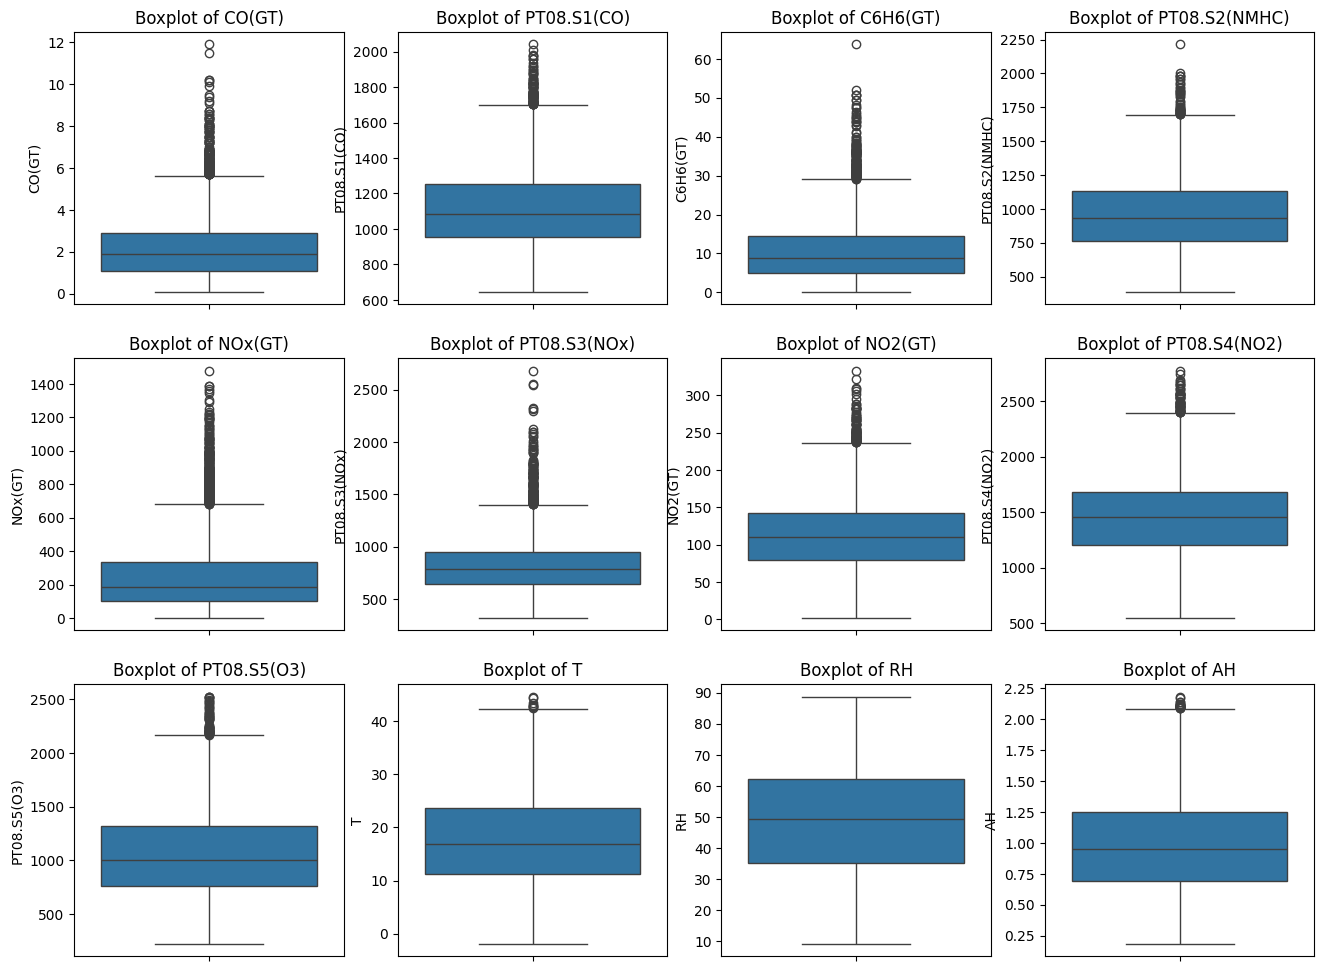

In [23]:
fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

In [24]:
def remove_outliers(df):
    cleaned = df.copy()
    for col in cleaned.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = cleaned[col].quantile(0.25)
        Q3 = cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        cleaned[col] = np.where(
            (cleaned[col] < lower) | (cleaned[col] > upper),
            np.nan,  # mark outlier
            cleaned[col]
        )
    return cleaned



df = remove_outliers(df)
df = df.interpolate(method='time')  # fill gaps smoothly


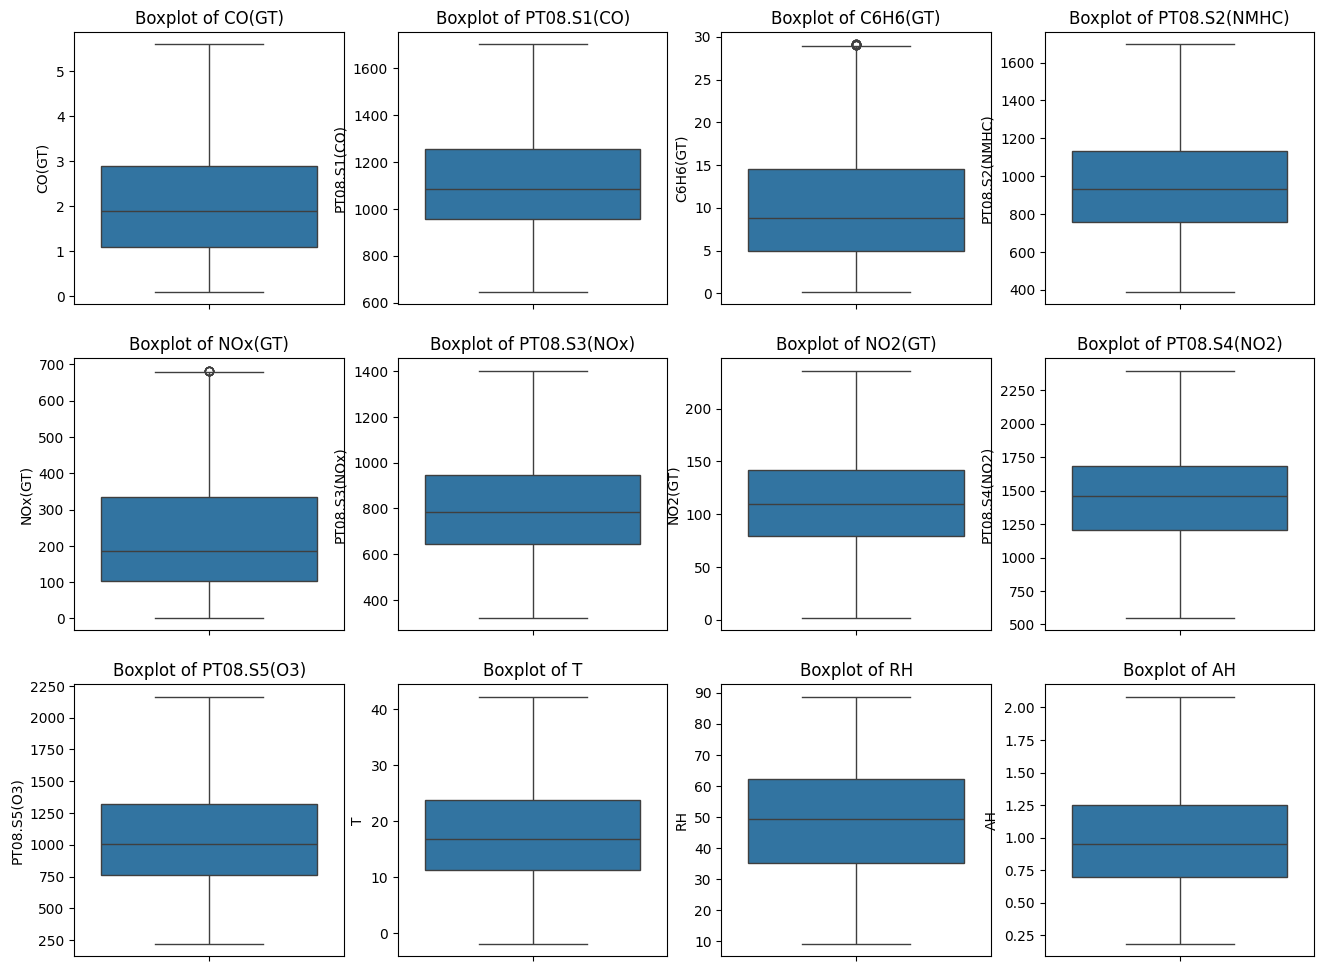

In [25]:
fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

In [26]:
df.shape

(6941, 12)

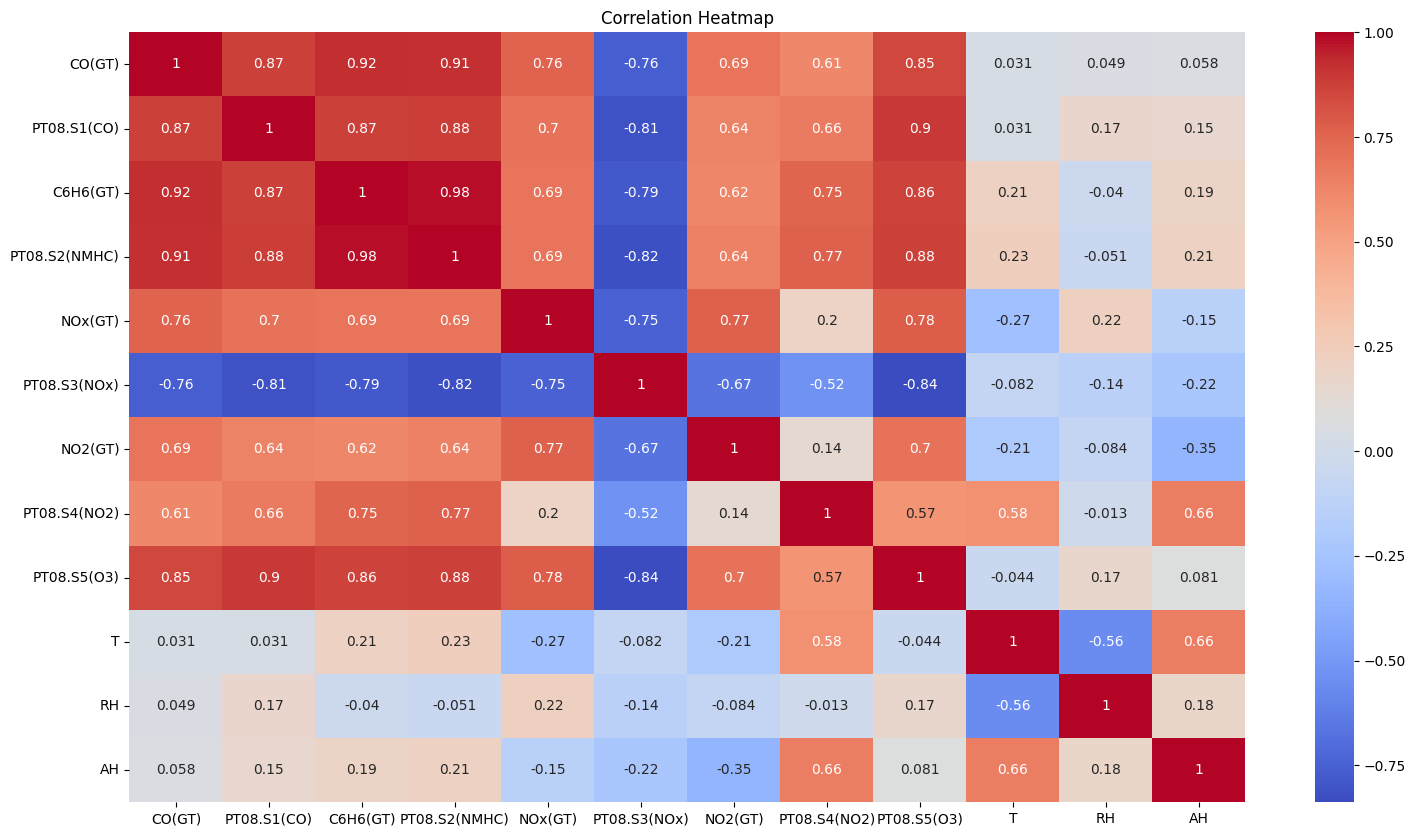

In [27]:
plt.figure(figsize=(18, 10))
correlation=df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [28]:
def add_time_features(frame):
    f = frame.copy()
    f['hour'] = f.index.hour
    f['dow'] = f.index.dayofweek
    f['month'] = f.index.month
    f['is_weekend'] = (f['dow'] >= 5).astype(int)
    f['hour_sin'] = np.sin(2*np.pi*f['hour']/24)
    f['hour_cos'] = np.cos(2*np.pi*f['hour']/24)
    f['month_sin'] = np.sin(2*np.pi*f['month']/12)
    f['month_cos'] = np.cos(2*np.pi*f['month']/12)
    return f

In [29]:
def add_lags(frame, cols, lags):
    f = frame.copy()
    for c in cols:
        if c in f.columns:
            for L in lags:
                f[f"{c}_lag{L}"] = f[c].shift(L)
    return f



def add_roll(frame, cols, wins):
    f = frame.copy()
    for c in cols:
        if c in f.columns:
            for w in wins:
                f[f"{c}_roll{w}m"] = f[c].rolling(w, min_periods=1).mean().shift(1)
    return f

In [30]:
sensor_cols = [c for c in df.columns if c.startswith('PT08.')] + ['T','RH','AH']
targets = [c for c in ['CO(GT)','NO2(GT)'] if c in df.columns]

base = add_time_features(df)
base = add_lags(base, sensor_cols + targets, lags=[1,3,6,24])
base = add_roll(base, sensor_cols + targets, wins=[3,24])

preprocessed_df = base.dropna().copy()
preprocessed_df.shape

(6917, 80)

In [31]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6917 entries, 2004-03-11 20:00:00 to 2005-04-04 14:00:00
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CO(GT)                 6917 non-null   float64
 1   PT08.S1(CO)            6917 non-null   float64
 2   C6H6(GT)               6917 non-null   float64
 3   PT08.S2(NMHC)          6917 non-null   float64
 4   NOx(GT)                6917 non-null   float64
 5   PT08.S3(NOx)           6917 non-null   float64
 6   NO2(GT)                6917 non-null   float64
 7   PT08.S4(NO2)           6917 non-null   float64
 8   PT08.S5(O3)            6917 non-null   float64
 9   T                      6917 non-null   float64
 10  RH                     6917 non-null   float64
 11  AH                     6917 non-null   float64
 12  hour                   6917 non-null   int32  
 13  dow                    6917 non-null   int32  
 14  month               

In [32]:
preprocessed_df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,...,T_roll3m,T_roll24m,RH_roll3m,RH_roll24m,AH_roll3m,AH_roll24m,CO(GT)_roll3m,CO(GT)_roll24m,NO2(GT)_roll3m,NO2(GT)_roll24m
DateTime,,,,,,,,,,,,,,,,,,,,,
2004-03-11 20:00:00,4.2,1640.0,24.0,1404.0,351.0,743.0,165.0,2191.0,1654.0,9.6,...,9.933333,10.533333,67.033333,62.104167,0.818967,0.783442,4.066667,1.991667,152.666667,103.208333
2004-03-11 21:00:00,3.9,1313.0,12.8,1076.0,240.0,957.0,136.0,1707.0,1285.0,9.1,...,9.866667,10.366667,67.100000,62.891667,0.817233,0.785754,4.500000,2.058333,162.666667,105.375000
2004-03-11 22:00:00,1.5,965.0,4.7,749.0,94.0,1325.0,85.0,1333.0,821.0,8.2,...,9.466667,10.191667,67.033333,63.570833,0.795700,0.786438,4.200000,2.137500,157.666667,107.208333
2004-03-11 23:00:00,1.0,913.0,2.6,629.0,47.0,1289.5,53.0,1252.0,552.0,8.2,...,8.966667,10.037500,65.066667,63.962500,0.748567,0.783950,3.200000,2.108333,128.666667,106.000000
2004-03-12 00:00:00,1.7,1080.0,5.9,805.0,122.0,1254.0,97.0,1375.0,816.0,8.3,...,8.500000,9.920833,62.733333,63.995833,0.699367,0.778908,2.133333,2.058333,91.333333,103.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,...,13.800000,18.916667,49.033333,36.654167,0.749533,0.680800,4.300000,1.612500,172.000000,120.625000
2005-04-04 11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,...,17.866667,19.087500,38.166667,36.595833,0.753600,0.686479,4.000000,1.691667,183.666667,123.625000
2005-04-04 12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,...,21.466667,19.220833,29.766667,36.595833,0.739133,0.691663,3.133333,1.733333,185.333333,126.375000


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in preprocessed_df.columns:
    preprocessed_df[col] = scaler.fit_transform(preprocessed_df[[col]])


In [34]:
preprocessed_df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,...,T_roll3m,T_roll24m,RH_roll3m,RH_roll24m,AH_roll3m,AH_roll24m,CO(GT)_roll3m,CO(GT)_roll24m,NO2(GT)_roll3m,NO2(GT)_roll24m
DateTime,,,,,,,,,,,,,,,,,,,,,
2004-03-11 20:00:00,1.646353,2.487558,2.056811,1.729689,0.697508,-0.282399,1.130400,2.150025,1.502038,-0.924862,...,-0.893737,-0.908950,1.065677,1.009077,-0.418830,-0.526590,1.689540,-0.182380,0.910296,-0.325392
2004-03-11 21:00:00,1.409172,0.934589,0.378552,0.461151,0.032608,0.678399,0.497012,0.747740,0.576627,-0.981408,...,-0.901338,-0.929907,1.069585,1.069194,-0.423173,-0.520585,2.065294,-0.086026,1.141192,-0.254776
2004-03-11 22:00:00,-0.488283,-0.718113,-0.835189,-0.803520,-0.841945,2.330611,-0.616876,-0.335844,-0.587033,-1.083190,...,-0.946940,-0.951912,1.065677,1.121042,-0.477118,-0.518810,1.805157,0.028393,1.025744,-0.195024
2004-03-11 23:00:00,-0.883586,-0.965068,-1.149863,-1.267619,-1.123479,2.171226,-1.315787,-0.570524,-1.261655,-1.083190,...,-1.003943,-0.971297,0.950407,1.150942,-0.595197,-0.525270,0.938034,-0.013761,0.356145,-0.234406
2004-03-12 00:00:00,-0.330162,-0.171961,-0.655376,-0.586940,-0.674222,2.011842,-0.354785,-0.214158,-0.599572,-1.071881,...,-1.057146,-0.985967,0.813646,1.153486,-0.718453,-0.538362,0.013103,-0.086026,-0.505867,-0.328108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,0.776687,0.939338,0.483443,0.557838,1.422309,-1.198299,1.676423,-0.217056,1.690130,0.466164,...,-0.452914,0.145185,0.010663,-0.933769,-0.592775,-0.793124,1.891869,-0.730388,1.356695,0.242252
2005-04-04 11:00:00,0.223262,0.222218,0.168769,0.271644,0.709488,-0.906468,1.436173,-0.535757,0.536501,0.737583,...,0.010711,0.166665,-0.626254,-0.938222,-0.582587,-0.778377,1.631732,-0.615969,1.626074,0.340028
2005-04-04 12:00:00,0.223262,0.122486,0.318614,0.410873,0.350083,-0.910958,1.348809,-0.602394,0.092605,1.031621,...,0.421132,0.183431,-1.118594,-0.938222,-0.618830,-0.764917,0.880226,-0.555748,1.664556,0.429656


In [35]:
targets = ["CO(GT)", "NO2(GT)"]
features = [col for col in preprocessed_df.columns if col not in targets]

for target in targets:
    n_features = len(features)
    n_cols = 4
    n_rows = (n_features + n_cols - 1) // n_cols

    plt.figure(figsize=(20, 5*n_rows))
    for i, col in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.scatterplot(x=preprocessed_df[col], y=preprocessed_df[target], s=10)
        plt.xlabel(col, fontsize=8)
        plt.ylabel(target, fontsize=8)
        plt.tight_layout()

    plt.suptitle(f"Scatter plots of all features vs {target}", fontsize=16, y=1.02)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **splitting chronologically "timestamp split"**

In [36]:
print(preprocessed_df.index.min(), preprocessed_df.index.max())

split_idx = int(len(preprocessed_df) * 0.8)


train = preprocessed_df.iloc[:split_idx]
test = preprocessed_df.iloc[split_idx:]

print("Train range:", train.index.min(), "to", train.index.max(), "->", train.shape)
print("Test range:", test.index.min(), "to", test.index.max(), "->", test.shape)


2004-03-11 20:00:00 2005-04-04 14:00:00
Train range: 2004-03-11 20:00:00 to 2005-01-30 19:00:00 -> (5533, 80)
Test range: 2005-01-30 20:00:00 to 2005-04-04 14:00:00 -> (1384, 80)


In [37]:
X_train_COGT = train.drop(columns=["CO(GT)"])
y_train_COGT = train["CO(GT)"]
X_test_COGT = test.drop(columns=["CO(GT)"])
y_test_COGT = test["CO(GT)"]


X_train_NO2GT = train.drop(columns=["NO2(GT)"])
y_train_NO2GT = train["NO2(GT)"]
X_test_NO2GT = test.drop(columns=["NO2(GT)"])
y_test_NO2GT = test["NO2(GT)"]

# **Train the base model**

In [38]:
base_model_for_COGT=LinearRegression()
base_model_for_COGT.fit(X_train_COGT, y_train_COGT )


LinearRegression()

In [39]:
COGT_preds = base_model_for_COGT.predict(X_test_COGT)

r2_COGT_base = r2_score(y_test_COGT, COGT_preds)
mae_COGT_base = mean_absolute_error(y_test_COGT, COGT_preds)
mse_COGT_base = mean_squared_error(y_test_COGT, COGT_preds)
rmse_COGT_base = np.sqrt(mse_COGT_base)



In [40]:
print("R2 Score:", r2_COGT_base)
print("MAE:", mae_COGT_base)
print("MSE:", mse_COGT_base)
print("RMSE:", rmse_COGT_base)

R2 Score: 0.9364196106436165
MAE: 0.16327038584814982
MSE: 0.056790067001148865
RMSE: 0.23830666587644767


In [41]:
base_model_for_NO2GT=LinearRegression()
base_model_for_NO2GT.fit(X_train_NO2GT, y_train_NO2GT)


LinearRegression()

In [42]:
NO2GT_preds = base_model_for_NO2GT.predict(X_test_NO2GT)

r2_NO2GT_base = r2_score(y_test_NO2GT, NO2GT_preds)
mae_NO2GT_base = mean_absolute_error(y_test_NO2GT, NO2GT_preds)
mse_NO2GT_base = mean_squared_error(y_test_NO2GT, NO2GT_preds)
rmse_NO2GT_base = np.sqrt(mse_NO2GT_base)



In [43]:
print("R2 Score:", r2_NO2GT_base)
print("MAE:", mae_NO2GT_base)
print("MSE:", mse_NO2GT_base)
print("RMSE:", rmse_NO2GT_base)

R2 Score: 0.9171856732445688
MAE: 0.21626278837589483
MSE: 0.08729345205207478
RMSE: 0.29545465312307195


# **Train ML model XGB**

In [44]:
xgb_COGT = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4)
xgb_COGT.fit(X_train_COGT, y_train_COGT)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
COGT_preds = xgb_COGT.predict(X_test_COGT)

r2_COGT_xgb = r2_score(y_test_COGT, COGT_preds)
mae_COGT_xgb = mean_absolute_error(y_test_COGT, COGT_preds)
mse_COGT_xgb = mean_squared_error(y_test_COGT, COGT_preds)
rmse_COGT_xgb = np.sqrt(mse_COGT_xgb)



In [46]:
print("R2 Score:", r2_COGT_xgb)
print("MAE:", mae_COGT_xgb)
print("MSE:", mse_COGT_xgb)
print("RMSE:", rmse_COGT_xgb)

R2 Score: 0.9240279105269161
MAE: 0.17521523123583435
MSE: 0.06785834586841093
RMSE: 0.26049634521123505


In [47]:
xgb_NO2GT = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4)
xgb_NO2GT.fit(X_train_NO2GT, y_train_NO2GT)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
NO2GT_preds = xgb_NO2GT.predict(X_test_NO2GT)

r2_NO2GT_xgb = r2_score(y_test_NO2GT,  NO2GT_preds)
mae_NO2GT_xgb = mean_absolute_error(y_test_NO2GT, NO2GT_preds)
mse_NO2GT_xgb = mean_squared_error(y_test_NO2GT, NO2GT_preds)
rmse_NO2GT_xgb = np.sqrt(mse_NO2GT_xgb)



In [49]:
print("R2 Score:", r2_NO2GT_xgb)
print("MAE:", mae_NO2GT_xgb)
print("MSE:", mse_NO2GT_xgb)
print("RMSE:", rmse_NO2GT_xgb)

R2 Score: 0.9015456901954466
MAE: 0.23643483488139833
MSE: 0.10377934481825933
RMSE: 0.3221480169398212


# **Train MLP model**

In [50]:
mlp_model_COGT = Sequential([
    Dense(256, activation='relu', input_shape=(79,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(32, activation='relu'),

    Dense(1, activation='linear')
])

mlp_model_COGT.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,537 (256.00 KB)

 Trainable params: 64,641 (252.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [51]:
mlp_model_COGT.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = mlp_model_COGT.fit(
    X_train_COGT, y_train_COGT,
    validation_data=(X_test_COGT, y_test_COGT),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7524 - mae: 0.6306 - val_loss: 0.1810 - val_mae: 0.3311
Epoch 2/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2096 - mae: 0.3574 - val_loss: 0.1171 - val_mae: 0.2555
Epoch 3/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1603 - mae: 0.3081 - val_loss: 0.1011 - val_mae: 0.2389
Epoch 4/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1263 - mae: 0.2720 - val_loss: 0.0974 - val_mae: 0.2267
Epoch 5/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1091 - mae: 0.2486 - val_loss: 0.0871 - val_mae: 0.2142
Epoch 6/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0981 - mae: 0.2390 - val_loss: 0.0804 - val_mae: 0.2078
Epoch 7/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0997 - mae: 0.2353 - val_loss: 0.0763 - val_mae: 0.1945
Epoch 8/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1058 - mae: 0.2450 - val_loss: 0.0774 - val_mae: 0.2024
Epoch 9/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

In [52]:
r2_COGT_mlp = r2_score(y_test_COGT, mlp_model_COGT.predict(X_test_COGT))
mae_COGT_mlp = mean_absolute_error(y_test_COGT, mlp_model_COGT.predict(X_test_COGT))
mse_COGT_mlp = mean_squared_error(y_test_COGT, mlp_model_COGT.predict(X_test_COGT))
rmse_COGT_mlp = np.sqrt(mse_COGT_mlp)



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [53]:
print("R2 Score:", r2_COGT_mlp)
print("MAE:", mae_COGT_mlp)
print("MSE:", mse_COGT_mlp)
print("RMSE:", rmse_COGT_mlp)


R2 Score: 0.9223421511776922
MAE: 0.18283427484168505
MSE: 0.06936406779555451
RMSE: 0.2633705902251702


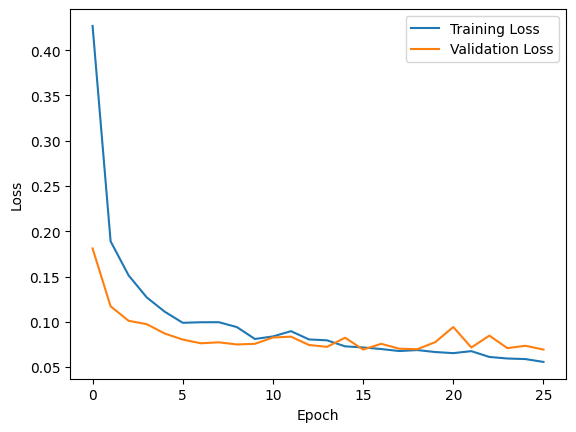

In [54]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
mlp_model_NO2GT =Sequential([
    Dense(256, activation='relu', input_shape=(79,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(32, activation='relu'),

    Dense(1, activation='linear')
])

mlp_model_COGT.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,821 (761.02 KB)

 Trainable params: 64,641 (252.50 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 129,284 (505.02 KB)

In [56]:
mlp_model_NO2GT.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = mlp_model_NO2GT.fit(
    X_train_NO2GT, y_train_NO2GT,
    validation_data=(X_test_NO2GT, y_test_NO2GT),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6132 - mae: 0.5867 - val_loss: 0.4298 - val_mae: 0.5250
Epoch 2/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2220 - mae: 0.3668 - val_loss: 0.2093 - val_mae: 0.3507
Epoch 3/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1628 - mae: 0.3163 - val_loss: 0.2243 - val_mae: 0.3742
Epoch 4/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1350 - mae: 0.2851 - val_loss: 0.1612 - val_mae: 0.3053
Epoch 5/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1195 - mae: 0.2674 - val_loss: 0.1500 - val_mae: 0.2977
Epoch 6/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1158 - mae: 0.2634 - val_loss: 0.1353 - val_mae: 0.2873
Epoch 7/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1107 - mae: 0.2568 - val_loss: 0.1201 - val_mae: 0.2649
Epoch 8/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0969 - mae: 0.2397 - val_loss: 0.1083 - val_mae: 0.2512
Epoch 9/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/

In [57]:
r2_NO2GT_mlp = r2_score(y_test_NO2GT,mlp_model_NO2GT.predict(X_test_NO2GT))
mae_NO2GT_mlp=mean_absolute_error(y_test_NO2GT,mlp_model_NO2GT.predict(X_test_NO2GT))
mse_NO2GT_mlp=mean_squared_error(y_test_NO2GT,mlp_model_NO2GT.predict(X_test_NO2GT))
rmse_NO2GT_MLP=np.sqrt(mse_NO2GT_mlp)



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [58]:
print("R2 Score:", r2_NO2GT_mlp)
print("MAE:", mae_NO2GT_mlp)
print("MSE:", mse_NO2GT_mlp)
print("RMSE:", rmse_NO2GT_MLP)


R2 Score: 0.9213066752117474
MAE: 0.2152958803183145
MSE: 0.082949560098563
RMSE: 0.2880096527871297


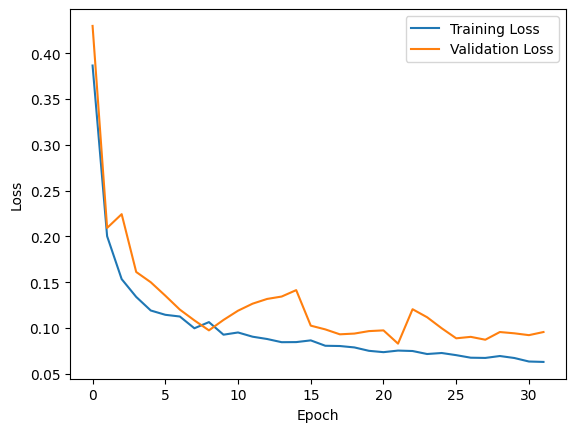

In [59]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **comparison**

In [60]:
models = ["Linear Regression", "XGBoost", "MLP"]
COGT_R2_SCORES = [r2_COGT_base, r2_COGT_xgb, r2_COGT_mlp]
COGT_RMSE_SCORES = [rmse_COGT_base, rmse_COGT_xgb, rmse_COGT_mlp]
COGT_MAE_SCORES = [mae_COGT_base, mae_COGT_xgb, mae_COGT_mlp]

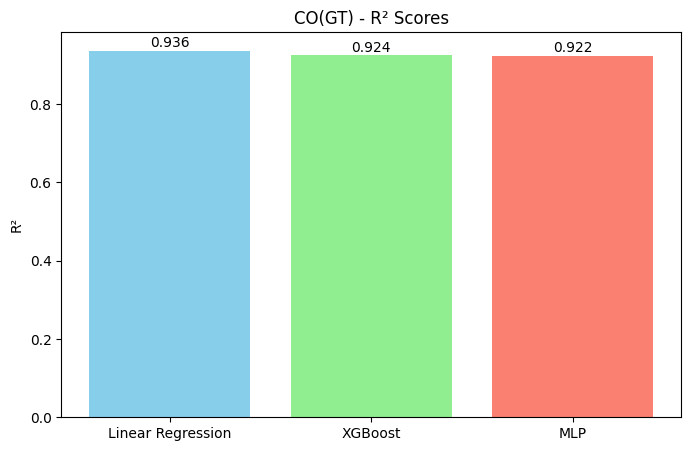

In [61]:
# --- R² SCORES ---
plt.figure(figsize=(8, 5))
plt.bar(models, COGT_R2_SCORES, color=["skyblue", "lightgreen", "salmon"])
plt.title("CO(GT) - R² Scores")
plt.ylabel("R²")
for i, v in enumerate(COGT_R2_SCORES):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.show()


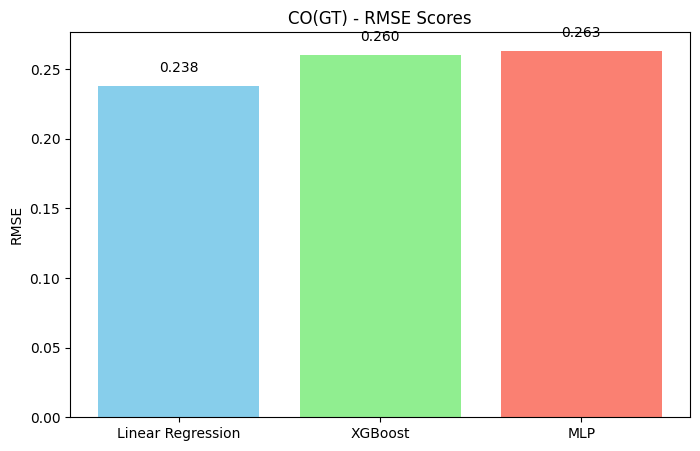

In [62]:
# --- RMSE SCORES ---
plt.figure(figsize=(8, 5))
plt.bar(models, COGT_RMSE_SCORES, color=["skyblue", "lightgreen", "salmon"])
plt.title("CO(GT) - RMSE Scores")
plt.ylabel("RMSE")
for i, v in enumerate(COGT_RMSE_SCORES):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.show()


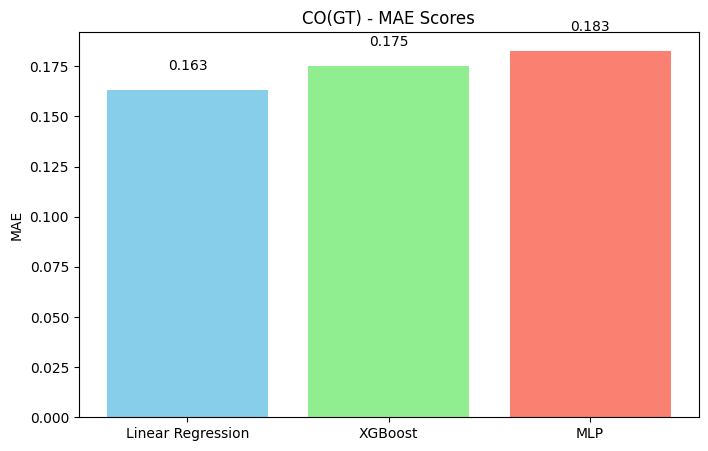

In [63]:
# --- MAE SCORES ---
plt.figure(figsize=(8, 5))
plt.bar(models, COGT_MAE_SCORES, color=["skyblue", "lightgreen", "salmon"])
plt.title("CO(GT) - MAE Scores")
plt.ylabel("MAE")
for i, v in enumerate(COGT_MAE_SCORES):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.show()

In [64]:
NO2GT_R2_SCORES = [r2_NO2GT_base, r2_NO2GT_xgb, r2_NO2GT_mlp]
NO2GT_RMSE_SCORES = [rmse_NO2GT_base, rmse_NO2GT_xgb, rmse_NO2GT_MLP]
NO2GT_MAE_SCORES = [mae_NO2GT_base, mae_NO2GT_xgb, mae_NO2GT_mlp]

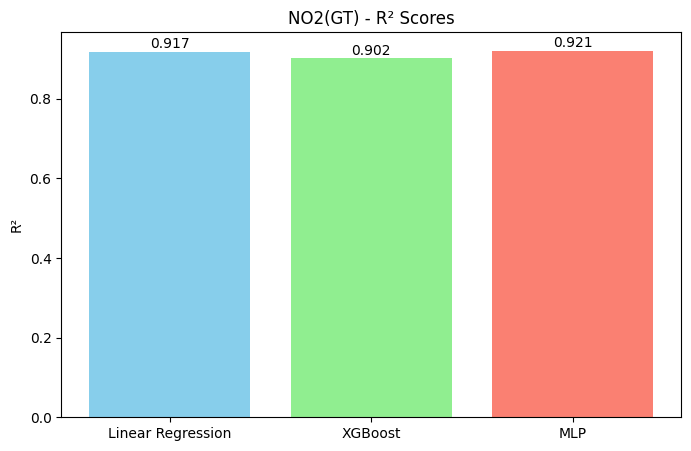

In [65]:
# --- R² SCORES ---
plt.figure(figsize=(8, 5))
plt.bar(models, NO2GT_R2_SCORES, color=["skyblue", "lightgreen", "salmon"])
plt.title("NO2(GT) - R² Scores")
plt.ylabel("R²")
for i, v in enumerate(NO2GT_R2_SCORES):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.show()


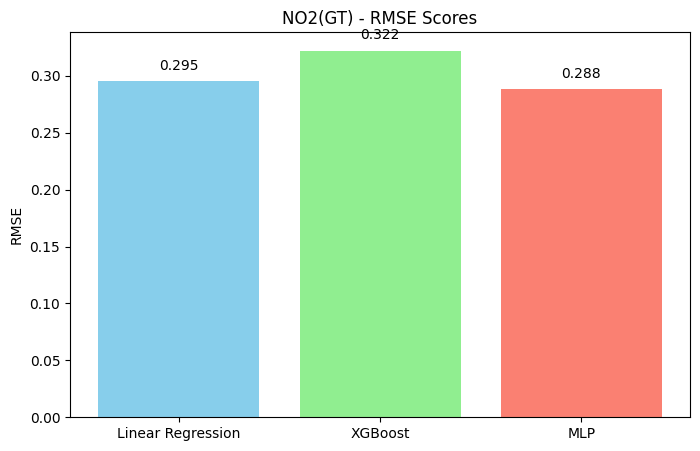

In [66]:
# --- RMSE SCORES ---
plt.figure(figsize=(8, 5))
plt.bar(models, NO2GT_RMSE_SCORES, color=["skyblue", "lightgreen", "salmon"])
plt.title("NO2(GT) - RMSE Scores")
plt.ylabel("RMSE")
for i, v in enumerate(NO2GT_RMSE_SCORES):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.show()


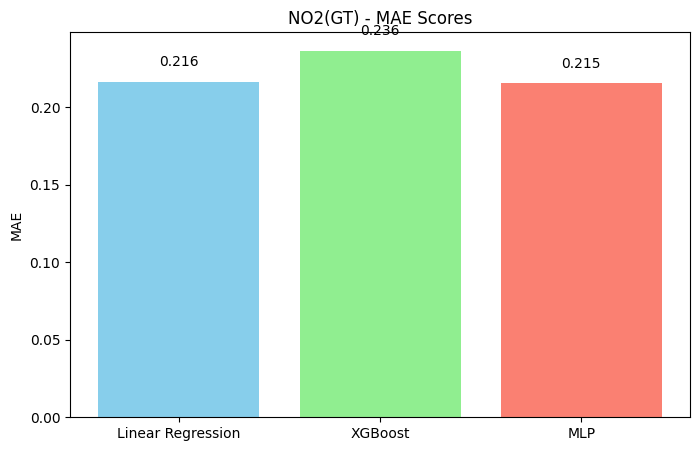

In [67]:
# --- MAE SCORES ---
plt.figure(figsize=(8, 5))
plt.bar(models, NO2GT_MAE_SCORES, color=["skyblue", "lightgreen", "salmon"])
plt.title("NO2(GT) - MAE Scores")
plt.ylabel("MAE")
for i, v in enumerate(NO2GT_MAE_SCORES):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.show()